# Introduction

For nearby stars (<10 pc), calculate the amount of diffracted light from any binary companions.


In [15]:
# For nearby binaries, compile their angular separation and difference in brightness

binaryList = []
binaryList.append({'name':'alf Cen',
                   'included':0,
                   'deltaMag':1.1,
                   'separation':5})

binaryList.append({'name':'70 Oph',
                   'included':0,
                   'deltaMag':1.95,
                   'separation':6.2})

binaryList.append({'name':'eta Cas',
                   'included':0,
                   'deltaMag':3.84,
                   'separation':13.2})

binaryList.append({'name':'36 Oph',
                   'included':0,
                   'deltaMag':0.0,
                   'separation':4.9})

binaryList.append({'name':'ksi Boo',
                   'included':0,
                   'deltaMag':2.19,
                   'separation':5.7})

binaryList.append({'name':'chi Dra',
                   'included':0,
                   'deltaMag':2.13,
                   'separation':0.1})

binaryList.append({'name':'Procyon',
                   'included':1,
                   'deltaMag':10.8-0.38, 
                   'separation':4.5})  

binaryList.append({'name':'Sirius',
                   'included':1,
                   'deltaMag':8.5-(-1.46),
                   'separation':7.5})

binaryList.append({'name':'eps Ind',  
                   'included':1,
                   'deltaMag':24.00-4.83, 
                   'separation':403.})

binaryList.append({'name':'Fomalhaut',  
                   'included':1, 
                   'deltaMag':7.08-1.72,
                   'separation':7062.7})

binaryList.append({'name':'bet CVn',
                   'included':1,
                   'deltaMag':10.70-4.31,
                   'separation':265.})

binaryList.append({'name':'61 Cyg',
                   'included':0,  
                   'deltaMag':0.8,
                   'separation':30.})

binaryList.append({'name':'54 Ori',  # = HIP 27913
                   'included':0,   
                   'deltaMag':7.5, 
                   'separation':0.5}) 

binaryList.append({'name':'p Eri',  # = HIP 7751
                   'included':0,   
                   'deltaMag':0.12,
                   'separation':11.6})

binaryList.append({'name':'mu Her',
                   'included':0,
                   'deltaMag':12.7-3.49,
                   'separation':1.4}) 

In [19]:
# set the telescope resolution and desired range of instrument contrasts

contrasts = [1.e-9,1.e-10,1.e-11]

wavelength = 0.70   # 615-800 nm bandpass for imaging; 656-800 nm for spectra
mirrorsize = 2.4
resolution = wavelength / mirrorsize / 1.e6 * 206265.
print 'Observing wavelength (um): ',wavelength
print 'Telescope size (m): ',mirrorsize
print 'Telescope resolution (mas): ',resolution*1000


Observing wavelength (um):  0.7
Telescope size (m):  2.4
Telescope resolution (mas):  60.160625


binary separation,deltaMag:  alf Cen 5 1.1
binary separation,deltaMag:  70 Oph 6.2 1.95
binary separation,deltaMag:  eta Cas 13.2 3.84
binary separation,deltaMag:  36 Oph 4.9 0.0
binary separation,deltaMag:  ksi Boo 5.7 2.19
binary separation,deltaMag:  chi Dra 0.1 2.13
binary separation,deltaMag:  Procyon 4.5 10.42
binary separation,deltaMag:  Sirius 7.5 9.96
binary separation,deltaMag:  eps Ind 403.0 19.17
binary separation,deltaMag:  Fomalhaut 7062.7 5.36
binary separation,deltaMag:  bet CVn 265.0 6.39
binary separation,deltaMag:  61 Cyg 30.0 0.8
binary separation,deltaMag:  54 Ori 0.5 7.5
binary separation,deltaMag:  p Eri 11.6 0.12
binary separation,deltaMag:  mu Her 1.4 9.21


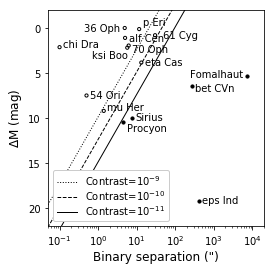

In [17]:
# plot the resulting contrast limits (diffraction only

import matplotlib.pyplot as plt
import numpy as np

figgy = plt.figure(figsize=(4.,4.))
plt.subplots_adjust(left=0.2,right=0.95,bottom=0.2,top=0.95)

Npts = 11
deltaM = np.linspace(-10,30,Npts)
deltaFlux = 10.**(-deltaM/2.5)

# for each desired contrast level, calculate minimum separation as f(deltaMag)
linetypes = ['k:','k--','k-']
for icontrast,contrast in enumerate(contrasts):
    x = (contrast / deltaFlux / 4. * np.pi)**(-1/3.)
    separation = x / np.pi * resolution
    plt.plot(separation,deltaM,
             linetypes[icontrast],linewidth=1,
             label='Contrast=10$^{'+str('%i' %np.log10(contrast))+'}$')
plt.xlabel('Binary separation (")',fontsize=12)
plt.ylabel('$\\Delta$M (mag)',fontsize=12)

plt.legend(loc=3,
           labelspacing=0.1,
           framealpha=1.0)
plt.semilogx()

plt.ylim(22.,-2.)
plt.xlim(0.05,20000.)

for binary in binaryList:
    # filled circles for binaries that may still be o.k. for imaging
    if binary['included']:
        fillcolor='k'
    else:
        fillcolor='None'  
    
    # add some offsets to avoid label overlap
    labelXoffset = 1.
    labelYoffset = 0.
    if binary['name']=='Fomalhaut':
        labelXoffset = 0.028
        labelYoffset = -0.2
    elif binary['name']=='mu Her':
        labelYoffset = -0.4
    elif binary['name']=='Procyon':
        labelYoffset = 0.7
    elif binary['name']=='ksi Boo':
        labelYoffset = 0.8
        labelXoffset = 0.1
    elif binary['name']=='70 Oph':
        labelYoffset = 0.4
    elif binary['name']=='chi Dra':
        labelYoffset = -0.3
    elif binary['name']=='bet CVn':
        labelXoffset = 0.99
        labelYoffset = 0.3
    elif binary['name']=='36 Oph':
        labelXoffset = 0.07
    elif binary['name']=='p Eri':
        labelYoffset = -0.8
    elif binary['name']=='61 Cyg':
        labelXoffset = 1.3
    elif binary['name']=='GJ 570':
        labelXoffset = 1.9
    
    plt.scatter(binary['separation'],binary['deltaMag'],
                c=fillcolor,edgecolor='k',s=10)
    plt.text(binary['separation']*1.25 *labelXoffset,
             binary['deltaMag'] + labelYoffset,
             binary['name'],
             verticalalignment='center')

    print 'binary separation,deltaMag: ',binary['name'],binary['separation'],binary['deltaMag']
    
plt.savefig('binaryCheck.pdf')
